(Adapted from lab)

# Dimension reduction

## Preliminaries

In [1]:
library(foreign)
library(ggplot2)

In [30]:
dat <- read.dbf("ComArea/ComArea_ACS14_f.dbf")

### Extracting the variables

In [4]:
varnames <- c("Under5P","Under18P","Over18P","Over21P", "Wht14P", "Blk14P", "Hisp14P",
             "VlntCrRt", "TeenBirth", "InfntMR")
vd1 <- dat[,varnames]
summary(vd1)

    Under5P          Under18P         Over18P         Over21P     
 Min.   : 2.842   Min.   : 6.341   Min.   :55.70   Min.   :51.13  
 1st Qu.: 6.171   1st Qu.:19.726   1st Qu.:72.37   1st Qu.:67.26  
 Median : 7.193   Median :24.262   Median :75.74   Median :72.04  
 Mean   : 7.471   Mean   :23.511   Mean   :76.49   Mean   :72.19  
 3rd Qu.: 8.697   3rd Qu.:27.626   3rd Qu.:80.27   3rd Qu.:76.68  
 Max.   :20.881   Max.   :44.298   Max.   :93.66   Max.   :90.63  
     Wht14P           Blk14P            Hisp14P          VlntCrRt      
 Min.   : 0.000   Min.   :  0.3788   Min.   : 0.000   Min.   :0.00420  
 1st Qu.: 6.117   1st Qu.:  4.4780   1st Qu.: 3.873   1st Qu.:0.01280  
 Median :51.355   Median : 15.7989   Median :12.756   Median :0.01950  
 Mean   :44.454   Mean   : 39.7934   Mean   :26.051   Mean   :0.03158  
 3rd Qu.:74.894   3rd Qu.: 90.8769   3rd Qu.:46.800   3rd Qu.:0.04490  
 Max.   :96.134   Max.   :100.0000   Max.   :92.271   Max.   :0.09790  
   TeenBirth         InfntM

#### Standardizing the variables

In [5]:
vds <- scale(vd1)
summary(vds)

    Under5P           Under18P          Over18P           Over21P        
 Min.   :-1.7277   Min.   :-2.5763   Min.   :-3.1188   Min.   :-2.94640  
 1st Qu.:-0.4853   1st Qu.:-0.5680   1st Qu.:-0.6174   1st Qu.:-0.68939  
 Median :-0.1037   Median : 0.1127   Median :-0.1127   Median :-0.02027  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.4577   3rd Qu.: 0.6174   3rd Qu.: 0.5680   3rd Qu.: 0.62798  
 Max.   : 5.0053   Max.   : 3.1188   Max.   : 2.5763   Max.   : 2.58070  
     Wht14P            Blk14P           Hisp14P           VlntCrRt      
 Min.   :-1.3608   Min.   :-0.9842   Min.   :-0.9265   Min.   :-1.1028  
 1st Qu.:-1.1735   1st Qu.:-0.8818   1st Qu.:-0.7888   1st Qu.:-0.7564  
 Median : 0.2113   Median :-0.5991   Median :-0.4728   Median :-0.4865  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.9318   3rd Qu.: 1.2755   3rd Qu.: 0.7380   3rd Qu.: 0.5366  
 Max.   : 1.5820   Max.   : 1.5033   Max.   

## Principal Component Analysis

In [6]:
prc <- prcomp(vds)

In [7]:
class(prc)

[1] "prcomp"

In [8]:
str(prc)

List of 5
 $ sdev    : num [1:10] 2.336 1.634 0.87 0.733 0.509 ...
 $ rotation: num [1:10, 1:10] -0.236 -0.321 0.321 0.332 0.357 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "Under5P" "Under18P" "Over18P" "Over21P" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:10] -7.58e-17 -2.54e-16 -8.27e-16 2.23e-17 -1.06e-16 ...
  ..- attr(*, "names")= chr [1:10] "Under5P" "Under18P" "Over18P" "Over21P" ...
 $ scale   : Named num [1:10] 2.68 6.66 6.66 7.15 32.67 ...
  ..- attr(*, "names")= chr [1:10] "Under5P" "Under18P" "Over18P" "Over21P" ...
 $ x       : num [1:77, 1:10] -0.0931 -2.2554 -4.3134 -2.0671 0.5885 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [9]:
summary(prc)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.3363 1.6341 0.87028 0.73333 0.50920 0.40736 0.2966
Proportion of Variance 0.5458 0.2670 0.07574 0.05378 0.02593 0.01659 0.0088
Cumulative Proportion  0.5458 0.8129 0.88863 0.94241 0.96834 0.98493 0.9937
                           PC8     PC9      PC10
Standard deviation     0.18543 0.16836 3.497e-16
Proportion of Variance 0.00344 0.00283 0.000e+00
Cumulative Proportion  0.99717 1.00000 1.000e+00

In [10]:
prc$sdev

[1] 2.336348e+00 1.634136e+00 8.702773e-01 7.333307e-01 5.091988e-01
 [6] 4.073595e-01 2.965849e-01 1.854334e-01 1.683626e-01 3.496716e-16

### Scree plot

In [11]:
scree_plot <- function(princ,cumulative=FALSE)
    { 
    pv <- princ$sdev^2
    pve <- pv / sum(pv)
    mtitle="Scree Plot"
    if (cumulative){
        pve <- cumsum(pve)
        mtitle="Cumulative Variance Proportion"
    }
    plot(pve,type="b",main=mtitle,xlab="Principal Components",
         ylab="Proportion Variance Explained")     
}

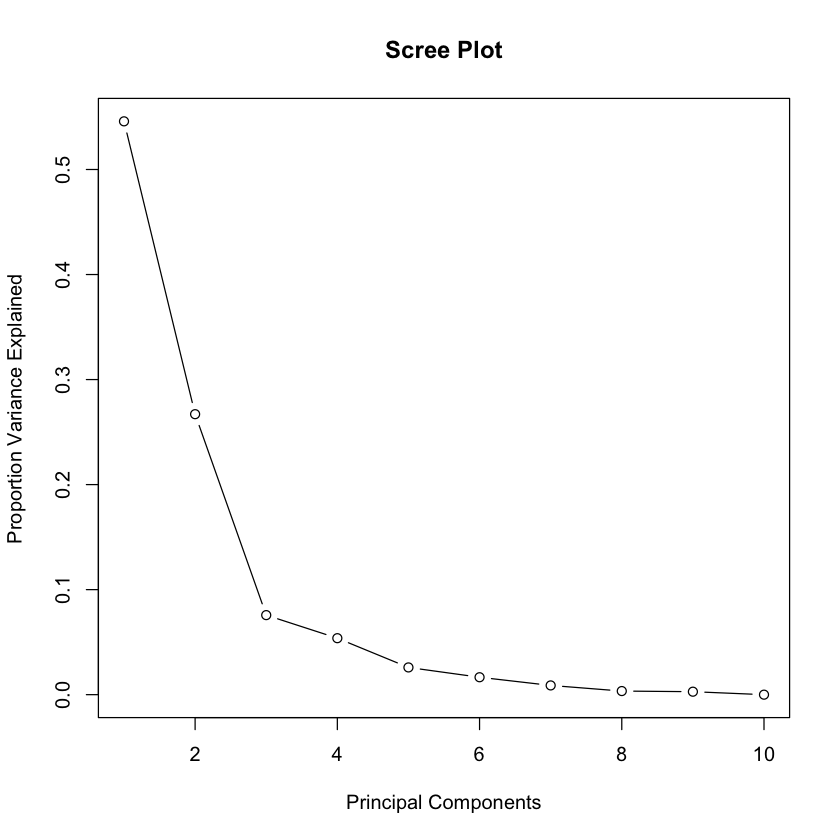

In [12]:
scree_plot(prc)

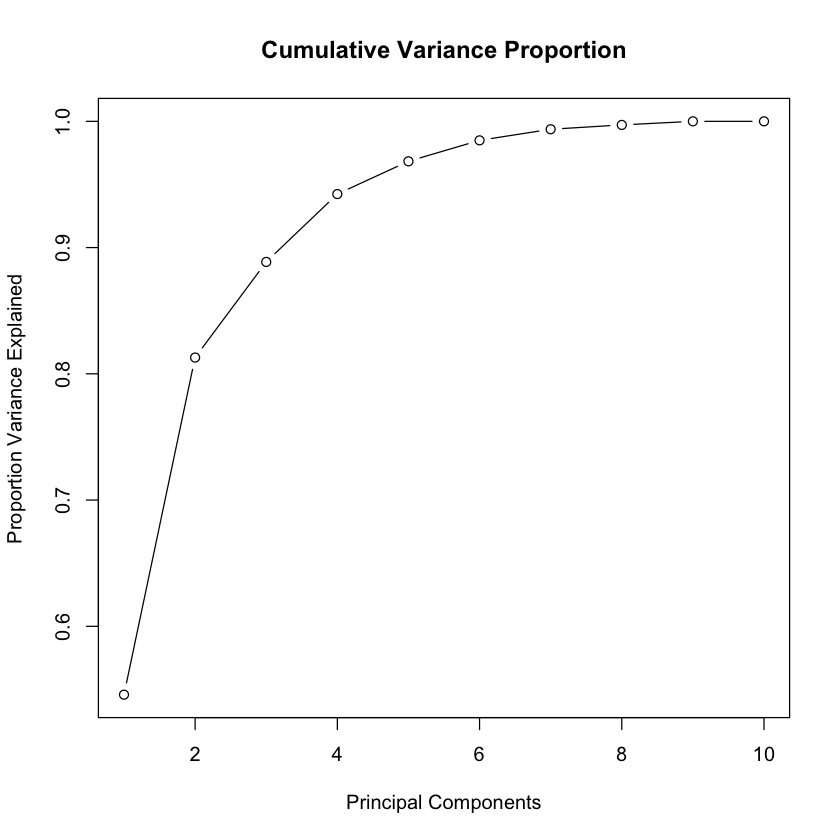

In [13]:
scree_plot(prc,cumulative=TRUE)

### Loadings

In [14]:
pcld <- prc$rotation
pcld

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Under5P,-0.23628013,-0.15483655,0.89838020,-0.10377189,-0.03025904,0.25880528,0.17549923,-0.03933391,0.04581306,-4.331277e-16
Under18P,-0.32102044,-0.37847716,-0.08207793,0.27922849,-0.02994236,-0.11924200,0.11528801,0.17129830,-0.33353552,7.071068e-01
Over18P,0.32102044,0.37847716,0.08207793,-0.27922849,0.02994236,0.11924200,-0.11528801,-0.17129830,0.33353552,7.071068e-01
Over21P,0.33170218,0.34975905,0.11005098,-0.26584331,-0.09037427,0.01796218,0.24863683,0.29818284,-0.72500687,8.326673e-16
Wht14P,0.35693665,-0.24882294,0.21987371,-0.02553798,-0.18705600,-0.71894791,0.06625417,-0.44780489,-0.06994185,-9.714451e-17
Blk14P,-0.33829891,0.34528832,-0.13607117,0.13611503,0.02726948,0.17236294,0.28022023,-0.74110435,-0.26659993,1.110223e-16
Hisp14P,0.05822134,-0.52212848,-0.16610201,-0.58905524,0.31665423,0.26687598,-0.21349022,-0.26480012,-0.24945201,2.602085e-16
VlntCrRt,-0.37287427,0.22301626,0.11897288,-0.13825234,-0.34134958,-0.16195686,-0.76273559,-0.02925250,-0.22932382,3.053113e-16
TeenBirth,-0.35858750,-0.02464357,-0.22697988,-0.57253548,-0.48545785,-0.14369239,0.40808794,0.10547594,0.23981907,2.775558e-17
InfntMR,-0.33937775,0.25120854,0.08487710,-0.22258814,0.70776511,-0.48945325,0.06328255,0.13779970,0.03844511,-5.551115e-17


### Principal component scores

In [15]:
pcscores <- prc$x
summary(pcscores)

      PC1               PC2               PC3                PC4         
 Min.   :-5.5784   Min.   :-3.4477   Min.   :-1.65252   Min.   :-1.4699  
 1st Qu.:-1.8566   1st Qu.:-1.2268   1st Qu.:-0.47847   1st Qu.:-0.4051  
 Median : 0.2754   Median : 0.1224   Median : 0.02757   Median :-0.1553  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 1.7699   3rd Qu.: 1.3474   3rd Qu.: 0.36502   3rd Qu.: 0.4160  
 Max.   : 4.0707   Max.   : 2.7110   Max.   : 4.62735   Max.   : 2.5364  
      PC5                PC6                PC7                 PC8          
 Min.   :-1.14077   Min.   :-1.04666   Min.   :-1.310246   Min.   :-0.43281  
 1st Qu.:-0.31089   1st Qu.:-0.25637   1st Qu.:-0.184041   1st Qu.:-0.12592  
 Median :-0.02653   Median :-0.00157   Median : 0.004644   Median :-0.01791  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.00000  
 3rd Qu.: 0.30999   3rd Qu.: 0.24338   3rd Qu.: 0.214528   3rd Qu.: 0.10006  
 Max.   : 1.07

In [16]:
class(pcscores)

[1] "matrix"

In [17]:
cor(pcscores)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
PC1,1.000000e+00,-2.295518e-16,2.943492e-16,1.900776e-16,-1.182702e-17,-8.011689e-16,-6.111253e-16,-2.329090e-17,-1.425279e-15,-0.16788058
PC2,-2.295518e-16,1.000000e+00,-3.280948e-16,8.639640e-17,-1.089618e-16,7.050696e-16,8.557472e-16,-1.491197e-15,1.604750e-15,-0.10806743
PC3,2.943492e-16,-3.280948e-16,1.000000e+00,2.105278e-16,3.949639e-17,-1.066595e-15,-7.281020e-16,2.094128e-16,3.447024e-16,-0.58162054
PC4,1.900776e-16,8.639640e-17,2.105278e-16,1.000000e+00,-8.883720e-17,-5.339273e-16,1.518071e-16,8.642357e-16,-7.466087e-16,-0.19270848
PC5,-1.182702e-17,-1.089618e-16,3.949639e-17,-8.883720e-17,1.000000e+00,1.143282e-16,-1.922540e-16,-4.830260e-16,4.277672e-16,-0.17993823
PC6,-8.011689e-16,7.050696e-16,-1.066595e-15,-5.339273e-16,1.143282e-16,1.000000e+00,4.715528e-16,-6.430075e-16,-3.880277e-16,-0.03983914
PC7,-6.111253e-16,8.557472e-16,-7.281020e-16,1.518071e-16,-1.922540e-16,4.715528e-16,1.000000e+00,-1.395752e-14,-6.018980e-16,-0.11420764
PC8,-2.329090e-17,-1.491197e-15,2.094128e-16,8.642357e-16,-4.830260e-16,-6.430075e-16,-1.395752e-14,1.000000e+00,-2.587807e-16,0.01119885
PC9,-1.425279e-15,1.604750e-15,3.447024e-16,-7.466087e-16,4.277672e-16,-3.880277e-16,-6.018980e-16,-2.587807e-16,1.000000e+00,-0.17427600
PC10,-1.678806e-01,-1.080674e-01,-5.816205e-01,-1.927085e-01,-1.799382e-01,-3.983914e-02,-1.142076e-01,1.119885e-02,-1.742760e-01,1.00000000


#### Converting the scores to a data frame

In [18]:
pcs1 <- as.data.frame(pcscores)
pcs1$AREA_ID <- as.integer(dat$ComAreaID)
summary(pcs1)

      PC1               PC2               PC3                PC4         
 Min.   :-5.5784   Min.   :-3.4477   Min.   :-1.65252   Min.   :-1.4699  
 1st Qu.:-1.8566   1st Qu.:-1.2268   1st Qu.:-0.47847   1st Qu.:-0.4051  
 Median : 0.2754   Median : 0.1224   Median : 0.02757   Median :-0.1553  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 1.7699   3rd Qu.: 1.3474   3rd Qu.: 0.36502   3rd Qu.: 0.4160  
 Max.   : 4.0707   Max.   : 2.7110   Max.   : 4.62735   Max.   : 2.5364  
      PC5                PC6                PC7                 PC8          
 Min.   :-1.14077   Min.   :-1.04666   Min.   :-1.310246   Min.   :-0.43281  
 1st Qu.:-0.31089   1st Qu.:-0.25637   1st Qu.:-0.184041   1st Qu.:-0.12592  
 Median :-0.02653   Median :-0.00157   Median : 0.004644   Median :-0.01791  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.00000  
 3rd Qu.: 0.30999   3rd Qu.: 0.24338   3rd Qu.: 0.214528   3rd Qu.: 0.10006  
 Max.   : 1.07

In [19]:
write.csv(pcs1, "pca.csv")

#### Plotting the PC scores

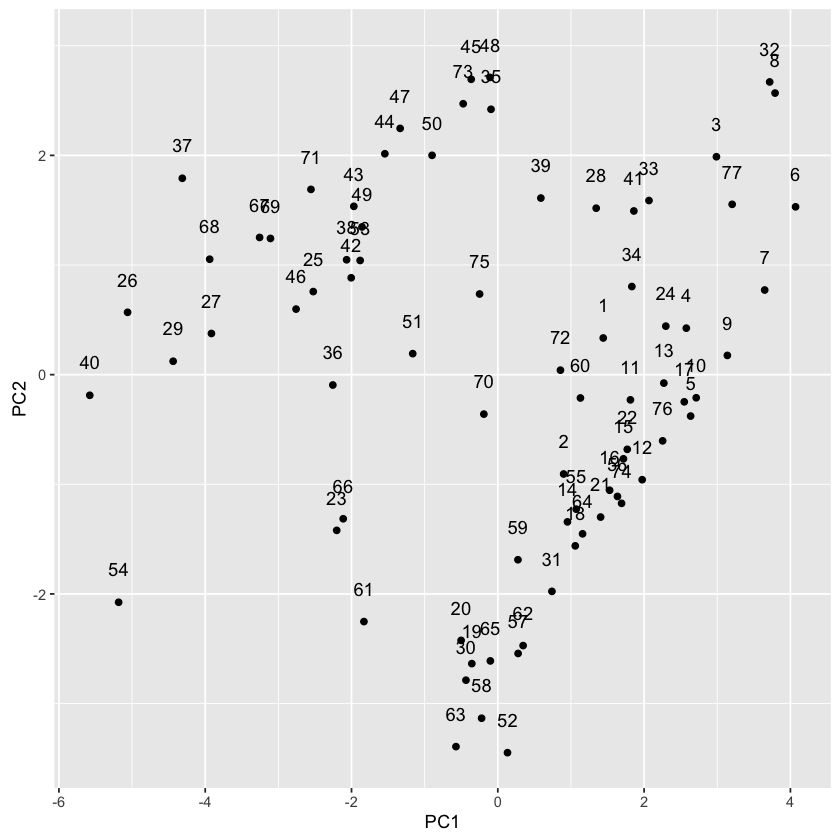

In [20]:
ggplot(pcs1,aes(x=PC1,y=PC2)) +
 geom_point() + geom_text(aes(label=AREA_ID),nudge_y=+0.3) 

### Biplot

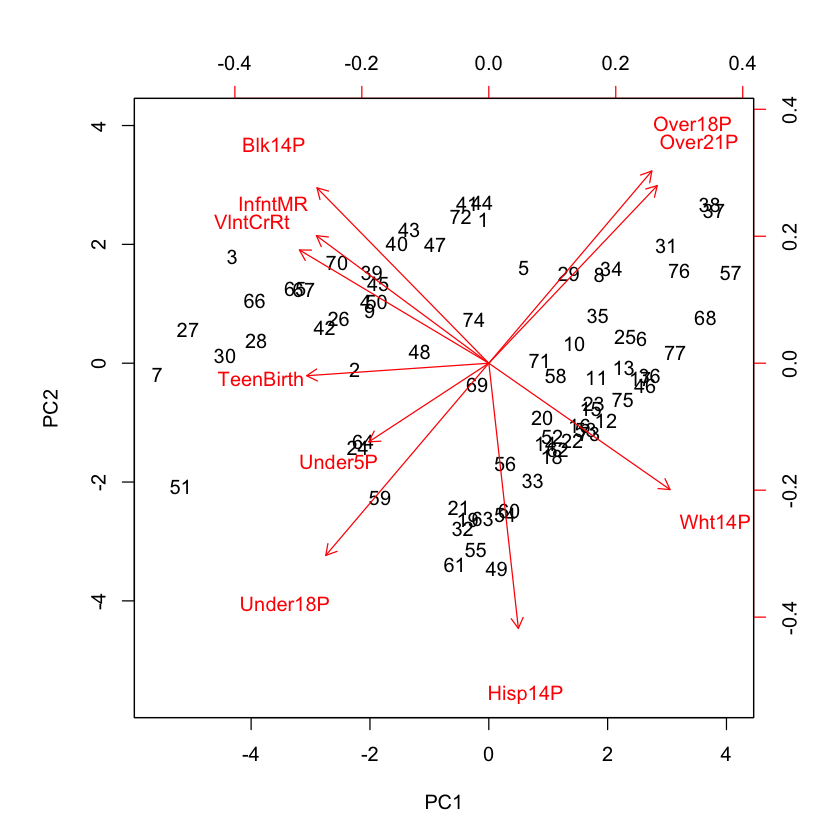

In [21]:
biplot(prc,scale=0)

## Multidimensional scaling

### Creating the distance matrix

In [22]:
vdiss <- dist(vds)

### MDS calculation

In [23]:
vmds <- cmdscale(vdiss)

In [24]:
class(vmds)

[1] "matrix"

In [25]:
dim(vmds)

[1] 77  2

### Visualization

#### Convert matrix to data frame

In [26]:
datmds <- as.data.frame(vmds)
datmds$AID <- as.integer(dat$ComAreaID)

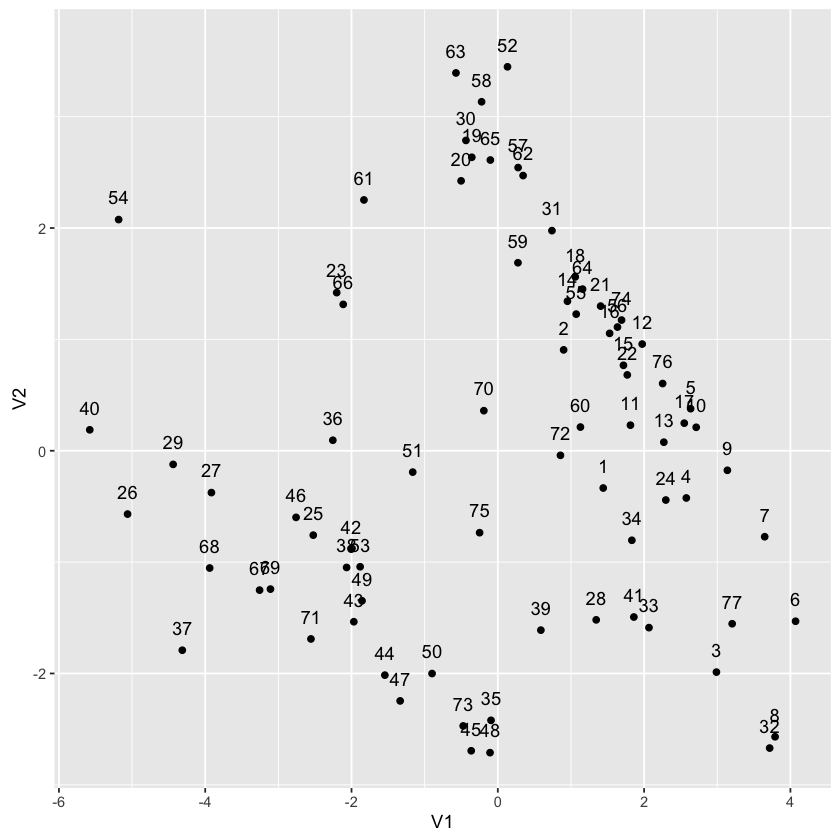

In [27]:
ggplot(datmds,aes(x=V1,y=V2)) +
 geom_point() + geom_text(aes(label=AID),nudge_y=+0.2)

In [28]:
write.csv(datmds, "output1.csv")